In [2]:
import pandas as pd

# notebooks/ → ../../ 로 두 단계 올라가서 data/ 폴더 접근
data = pd.read_csv("../../data/analy_data.csv")

print("데이터 크기:", data.shape)
data.head()

데이터 크기: (89822, 210)


,EXAMIN_YEAR,exmprs_no,age,sex,CTPRVN_CODE,PBHLTH_CODE,SPOT_NO,HSHLD_CODE,MBHLD_CODE,DONG_TY_CODE,...,cpr_03a2,cpr_03b2,cpr_04z1,sob_01z1,sob_02z1,soa_01z1,soa_06z2,soa_07z1,sod_02z3,churn
0,b'2024',b'2024111170001700102002201',31.0,1.0,b'11',b'11700017',b'00102',b'0022',b'01',b'1',...,1.0,1.0,1.0,7.0,1.0,1.0,3.0,2.0,5.0,1
1,b'2024',b'2024111170001700102005901',37.0,1.0,b'11',b'11700017',b'00102',b'0059',b'01',b'1',...,8.0,8.0,3.0,5.0,1.0,1.0,4.0,2.0,1.0,0
2,b'2024',b'2024111170001700102005902',36.0,2.0,b'11',b'11700017',b'00102',b'0059',b'02',b'1',...,8.0,8.0,3.0,6.0,1.0,1.0,4.0,2.0,1.0,1
3,b'2024',b'2024111170001700102017001',36.0,1.0,b'11',b'11700017',b'00102',b'0170',b'01',b'1',...,8.0,8.0,3.0,7.0,1.0,1.0,3.0,2.0,1.0,0
4,b'2024',b'2024111170001700191001801',64.0,1.0,b'11',b'11700017',b'00191',b'0018',b'01',b'1',...,8.0,8.0,8.0,3.0,3.0,2.0,88.0,8.0,5.0,0


In [15]:
import pandas as pd
import numpy as np

# 1. 데이터 불러오기
data = pd.read_csv("../../data/analy_data.csv")

# 2. 유지할 컬럼
keep_cols = [
    "nua_01z2", "nuc_02z1", "nuc_03z1", "ore_03z2", "ord_05z1", "ord_01d2",
    "ord_01f3", "obb_02a1", "obb_02b1", "obb_02d1", "ora_01z1", "orb_01z1","sex"
]

target_col = "churn"
if target_col in data.columns:
    keep_cols = [target_col] + keep_cols

data = data.loc[:, [c for c in keep_cols if c in data.columns]]

In [17]:
CODEBOOK = {
    "nua_01z2": "아침식사빈도",
    "nuc_02z1": "영양표시 인지여부",
    "nuc_03z1": "영양관심여부",
    "ore_03z2": "최근치과방문",
    "ord_05z1": "구강건강관리실천",
    "ord_01d2": "양치도구사용",
    "ord_01f3": "양치불가이유",
    "obb_02a1": "체중조절_운동",
    "obb_02b1": "체중조절_식이",
    "obb_02d1": "체중조절_단식",
    "ora_01z1": "주관적구강건강",
    "orb_01z1": "치과치료필요여부"
}


In [28]:
CODEMAP = {
    "nua_01z2": {  # 아침식사빈도
        1: "주5~7회",
        2: "주3~4회",
        3: "주1~2회",
        4: "거의안함(주0회)"
    },

    "nuc_02z1": {  # 영양표시 인지여부
        1: "예",
        2: "아니요"
    },

    "nuc_03z1": {  # 영양관심여부
        1: "예",
        2: "아니요"
    },

    "ore_03z2": {  # 최근치과방문 이유
        1: "시간없음",
        2: "증상경미",
        3: "경제적이유",
        4: "교통불편/거리멀음",
        5: "대기가길어서",
        6: "몸이불편/예약어려움",
        7: "치료두려움",
        8: "기타"
    },

    "ord_05z1": {  # 구강건강관리실천(양치불가 이유)
        1: "시간이 없어서",
        2: "칫솔질 할 장소가 없어서",
        3: "주변에 칫솔질을 하는 사람이 없어서",
        4: "필요성을 느끼지 못해서"
    },

    "ord_01d2": {  # 양치도구사용(점심 후 양치 여부)
        1: "예",
        2: "아니요",
        3: "어제 점심식사 하지 않음"
    },

    "ord_01f3": {  # 양치불가이유(저녁 기준)
        1: "예",
        2: "아니요",
        3: "어제 저녁식사 또는 잠자지 않음"
    },

    "obb_02a1": {  # 체중조절_운동
        1: "예",
        2: "아니요"
    },

    "obb_02b1": {  # 체중조절_식이
        1: "예",
        2: "아니요"
    },

    "obb_02d1": {  # 체중조절_단식
        1: "예",
        2: "아니요"
    },

    "ora_01z1": {  # 주관적구강건강
        1: "매우좋음",
        2: "좋음",
        3: "보통",
        4: "나쁨",
        5: "매우나쁨"
    },

    "orb_01z1": {  # 치과치료필요여부
        1: "매우불편",
        2: "불편",
        3: "그저그렇다",
        4: "별로불편하지않다",
        5: "전혀불편하지않다"
    }
}


In [36]:
data['sex'] = data['sex'].map({1: '남성', 2: '여성'})


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font="Malgun Gothic")

def plot_gender_barh(data, col, gender_col="sex"):
    # 성별 × 변수별 금연성공률
    h = data.groupby([col, gender_col])['churn'].mean().reset_index()

    # 코드값 → 한글 변환
    if col in CODEMAP:
        h[col] = h[col].map(CODEMAP[col])

    # 그래프
    plt.figure(figsize=(8, 4 + 0.4 * h[col].nunique()))  # 범주 개수 따라 세로 크기 자동 조정
    sns.barplot(data=h, y=col, x='churn', hue=gender_col,
                palette='coolwarm', orient='h')

    label = CODEBOOK.get(col, col)
    plt.title(f"{label}별 금연성공률 (성별 비교)")
    plt.xlabel("금연성공률")
    plt.ylabel(label)
    plt.xlim(0, 1)
    plt.legend(title="성별")
    plt.tight_layout()
    plt.show()


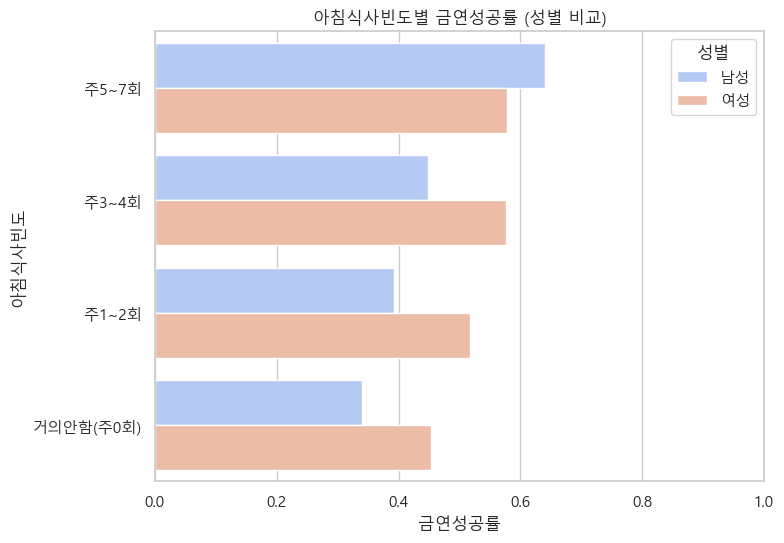

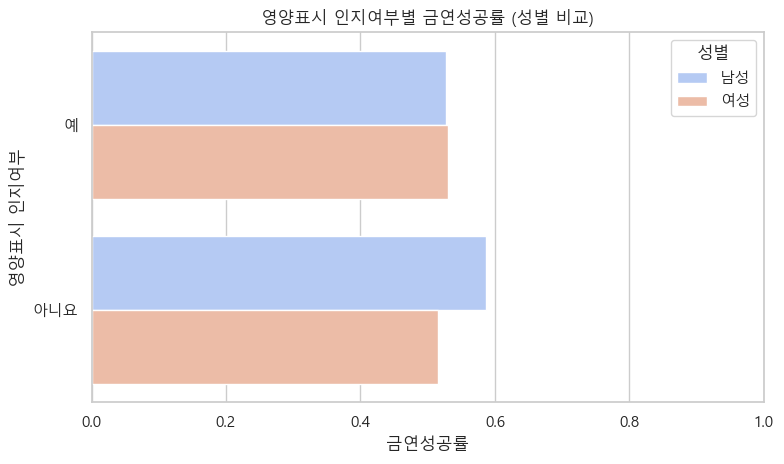

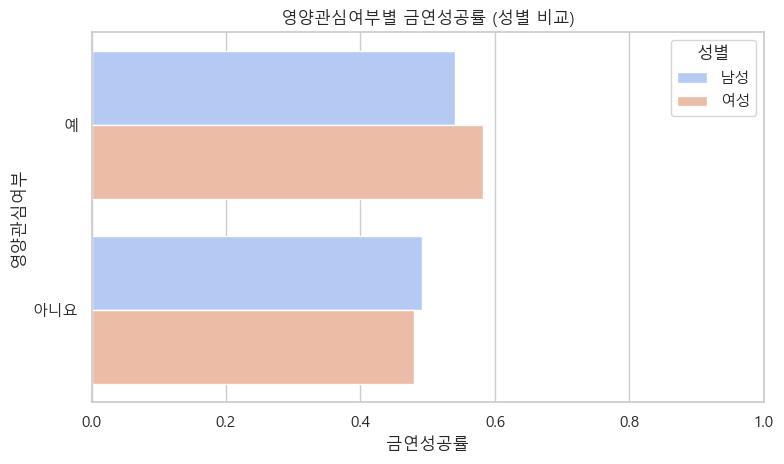

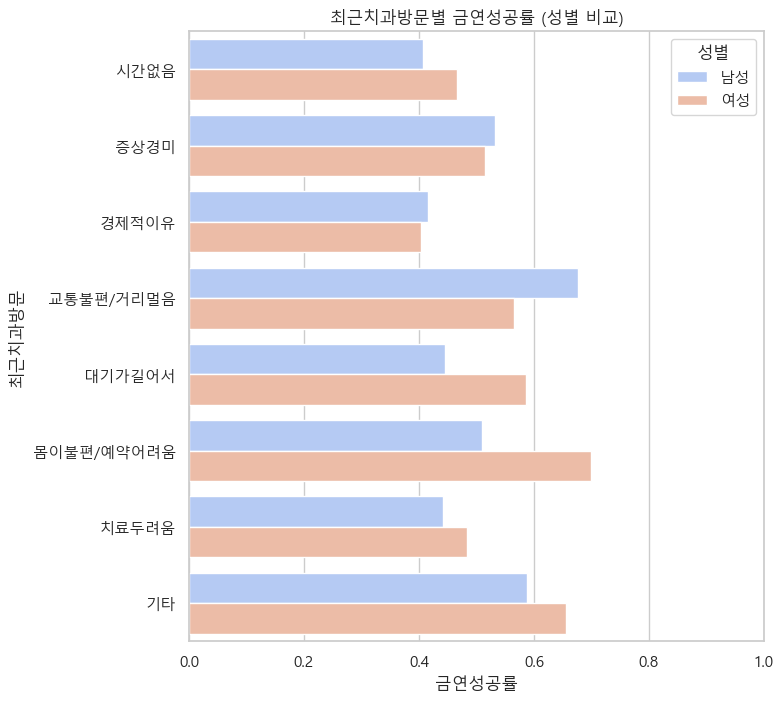

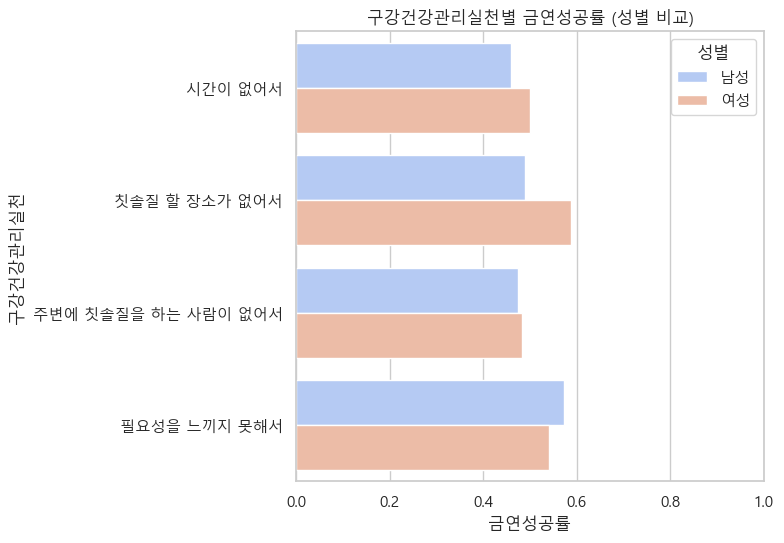

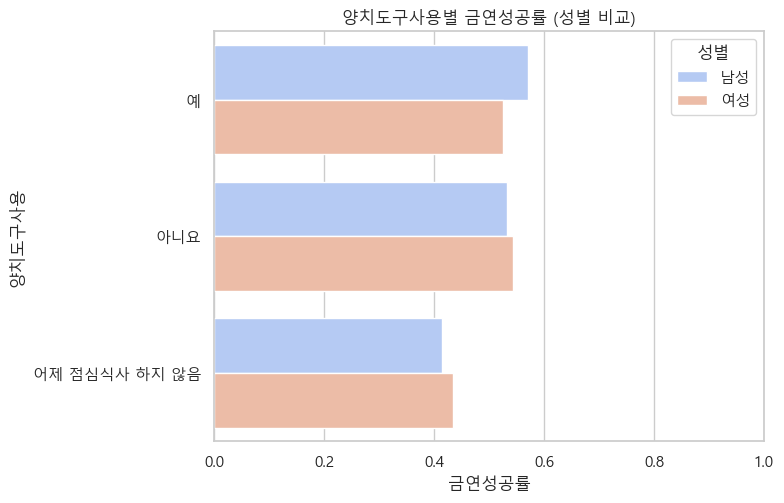

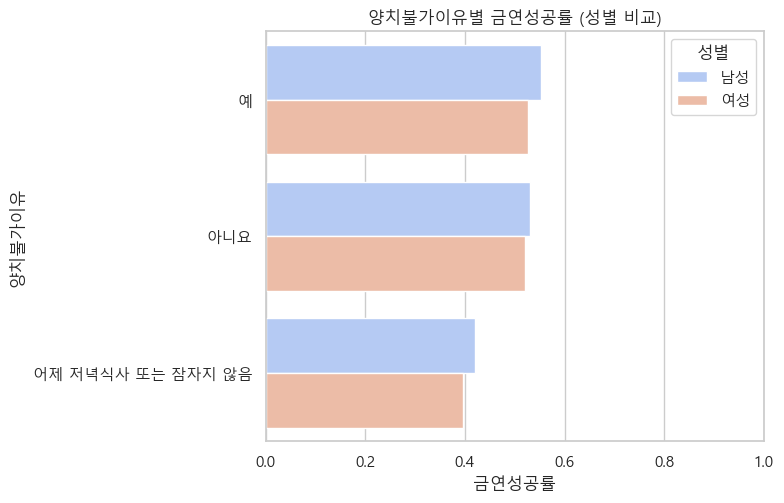

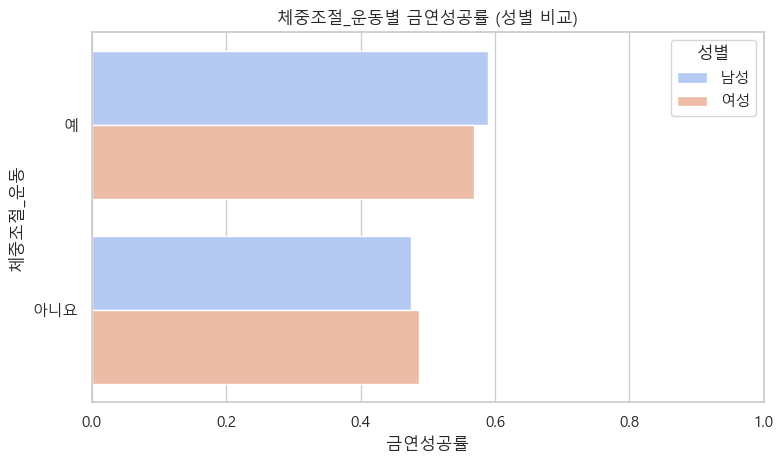

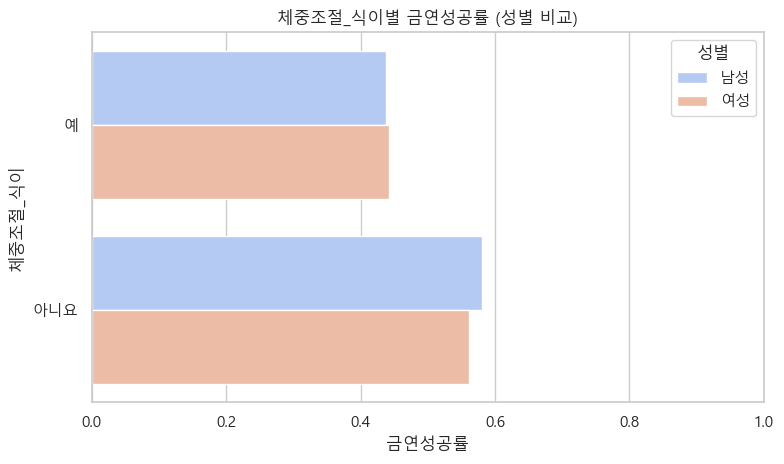

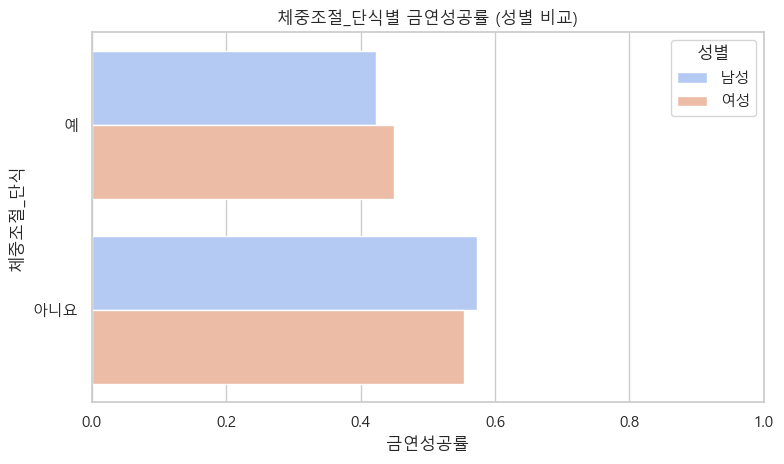

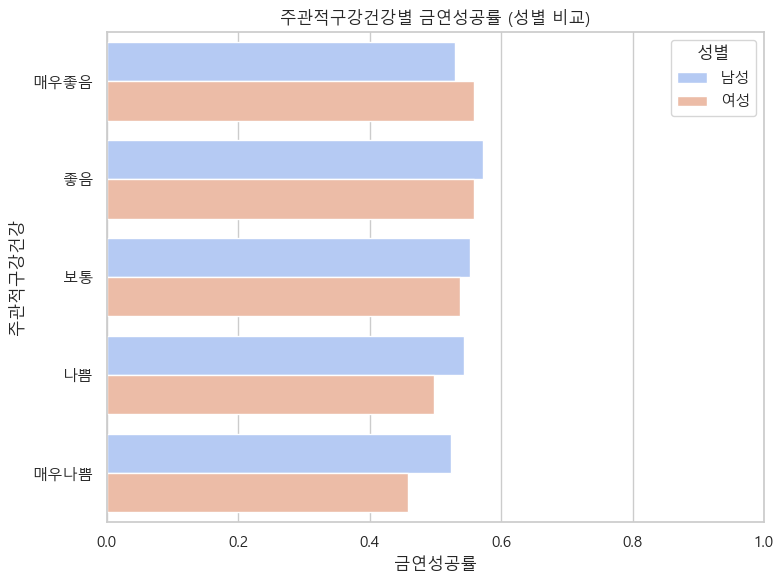

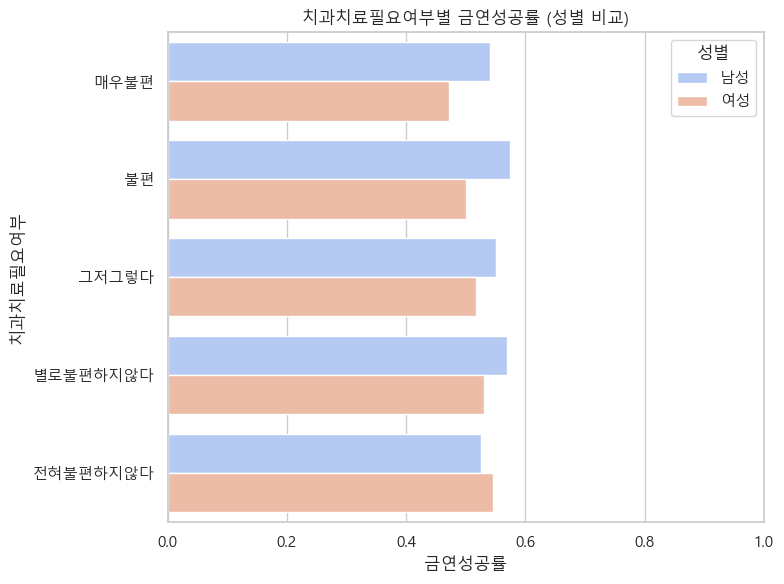

In [40]:
for col in CODEBOOK.keys():
    plot_gender_barh(data, col, gender_col="sex")


In [ ]:
import os
import pandas as pd

# 현재 노트북 파일 기준 프로젝트 루트 경로 계산
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(".")))
DATA_PATH = os.path.join(BASE_DIR, "data", "analy_data.csv")

data = pd.read_csv(DATA_PATH)
print("데이터 크기:", data.shape)